In [1]:
from sail.core import spawnvms
from sail.data import DataFrameGroup
from sail.algo import fdxgb
from sklearn.preprocessing import LabelEncoder

In [2]:
vms = spawnvms(4)
workplace = "/home/jjj/playground/tmp"

In [3]:
vms

['09899C0A88474D3FBFBDEFCED2033FE6',
 '4155253A0E11413A9ACBC8DE1DD30B32',
 'A60AA8CD61894F73A1D2790799BBD0E5',
 'D37DD9910E264C62ACADC68411C21EBB']

In [4]:
dfg = DataFrameGroup(vms, workplace)
dfg.import_data([0,0,0,0])

In [5]:
dfg.shape

[(900, 21), (900, 21), (900, 21), (134, 21)]

In [6]:
dfg.col_label

[Index(['state', 'months since diagnosis', 'area code', 'phone number',
        'metformin', 'insulin', 'number of emergency room visits',
        'fasting blood sugar', 'total doctor visits', 'time in hospital',
        'oral glucose tolerance (mg/dL)', 'number of lab procedures',
        'repaglinide dosage', 'total medication cost', 'number of procedures',
        'diag_1', 'diag_2', 'total medication types', 'diag_3',
        'diabetes hotline calls', 'readmission'],
       dtype='object'),
 Index(['state', 'months since diagnosis', 'area code', 'phone number',
        'metformin', 'insulin', 'number of emergency room visits',
        'fasting blood sugar', 'total doctor visits', 'time in hospital',
        'oral glucose tolerance (mg/dL)', 'number of lab procedures',
        'repaglinide dosage', 'total medication cost', 'number of procedures',
        'diag_1', 'diag_2', 'total medication types', 'diag_3',
        'diabetes hotline calls', 'readmission'],
       dtype='object'),


In [7]:
dtypes_labels = dfg.dtypes()

In [8]:
dtypes_labels

[state                               object
 months since diagnosis               int64
 area code                            int64
 phone number                        object
 metformin                           object
 insulin                             object
 number of emergency room visits      int64
 fasting blood sugar                float64
 total doctor visits                  int64
 time in hospital                   float64
 oral glucose tolerance (mg/dL)     float64
 number of lab procedures             int64
 repaglinide dosage                 float64
 total medication cost              float64
 number of procedures                 int64
 diag_1                             float64
 diag_2                             float64
 total medication types               int64
 diag_3                             float64
 diabetes hotline calls               int64
 readmission                           bool
 dtype: object,
 state                               object
 months since di

In [9]:
dfg.sample(vms[0], dfg.df[0])

state  months since diagnosis  area code phone number metformin insulin  \
0    DC                     180        415     370-4139        no     yes   
1    VT                     100        415     382-6135        no     yes   
2    OH                     119        415     359-5718        no     yes   
3    MO                      86        415     385-3111        no      no   
4    LA                     155        408     353-4880        no     yes   

   number of emergency room visits  fasting blood sugar  total doctor visits  \
0                               33                231.8                   78   
1                               25                215.9                   90   
2                               35                217.1                   92   
3                                0                 83.5                   96   
4                               39                183.3                  106   

   time in hospital  ...  number of lab procedures  repaglinide dosage  \
0             39.41  ...                        79               19.80   
1             36.70  ...                        92               21.92   
2             36.91  ...                       134               18.77   
3             14.20  ...                        63               18.79   
4             31.16  ...                       101               17.43   

   total medication cost  number of procedures  diag_1  diag_2  \
0                  206.9                   121    9.31     7.6   
1                  180.2                   157    8.11    11.6   
2                  249.5                    93   11.23     8.0   
3                  349.7                    75   15.74    12.6   
4                  263.7                    90   11.87     5.1   

   total medication types  diag_3  diabetes hotline calls  readmission  
0                       4    2.05                       1        False  
1                       4    3.13                       1        False  
2                       5    2.16                       2        False  
3                       3    3.40                       0        False  
4                       7    1.38                       1        False  

[5 rows x 21 columns]

In [10]:
desen_df = dfg.drop([['phone number']]*len(vms), [1]*len(vms), dfg.df)
y = dfg.get_col([['readmission']]*len(vms), desen_df)
y = dfg.apply([LabelEncoder().fit_transform]*len(vms), y)

In [11]:
clean_X = dfg.drop([['readmission']]*len(vms), [1]*len(vms), desen_df)
cate = [key for key in dict(dtypes_labels[0]) if dict(dtypes_labels[0])[key] in ['bool', 'object']]
cate.remove('phone number')
cate.remove('readmission')
clean_X = dfg.apply_and_change([LabelEncoder().fit_transform]*len(vms), [cate]*len(vms), clean_X)
X = dfg.to_numpy(clean_X)

In [12]:
data = {}
data['X'] = X[:-1]
data['y'] = y[:-1]
data['X_test'] = X[-1]
data['y_test'] = y[-1]
data['df_test'] = clean_X[-1]
data['feature_dim'] = dfg.shape[0][1]-2
vmagg=vms[-1]
vms=vms[:-1]
fdmod = fdxgb(vms, vmagg, data, workplace)

In [13]:
X[-1]

'37C18A6C8F23432EB66B2CC97884918E01BF2E19B799419FAE3B245326131AD9'

In [14]:
y[-1]

'BC5CDC30544E44D5880C75E0931FE8003D674955D0434385A9DF323868AA8BF5'

In [15]:
r = 4.0
L = min(40, data['feature_dim']-1)
mu = 0.0
sigma = 1.0
fdmod.gen_hashfn(data['feature_dim'], r, L, mu, sigma)

In [16]:
fdmod.gen_hashtables()

In [17]:
params = {'max_depth': 8 }
xgbraw = fdmod.init_model(params, data['feature_dim'])

In [18]:
xgbraw = fdmod.train(xgbraw)

Training round 0
Training round 1
Training round 2
Training round 3
Training round 4
Training round 5
Training round 6
Training round 7
Training round 8
Training round 9
Training round 10
Training round 11
Training round 12
Training round 13
Training round 14
Training round 15
Training round 16
Training round 17
Training round 18
Training round 19


pushing data
exec job
pulldata


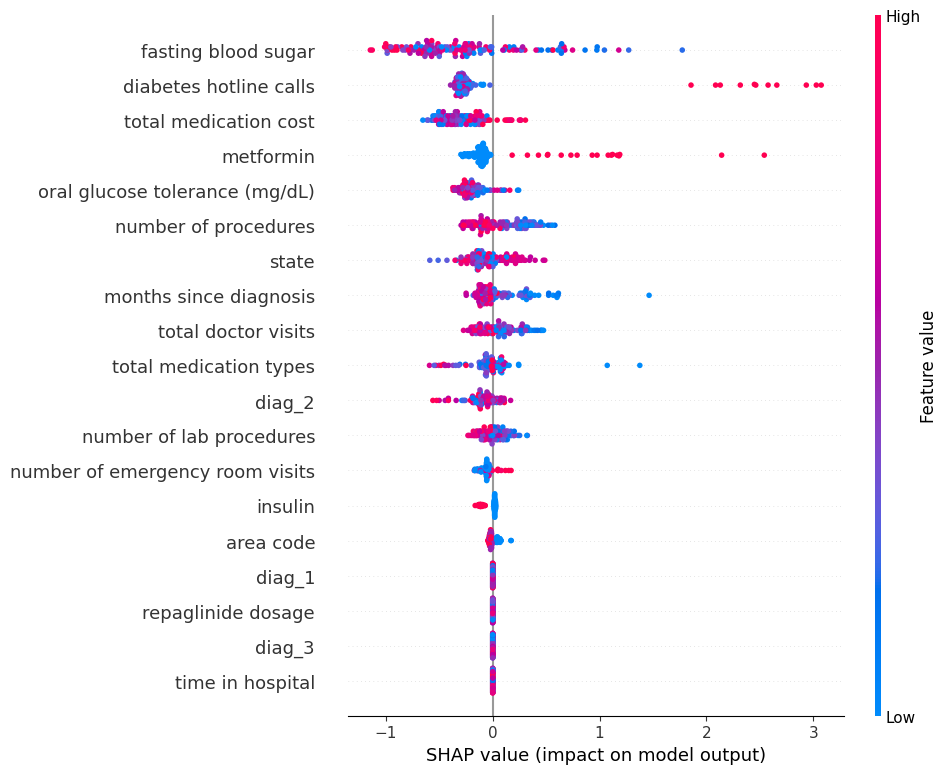

In [19]:
conf_mat, erros, fig = fdmod.test(xgbraw)

In [20]:
conf_mat

array([[110,   3],
       [ 14,   7]])

In [22]:
erros

'error: 0.12686567164179105    false negative rate: 0.6666666666666666    false positive rate: 0.02654867256637168'

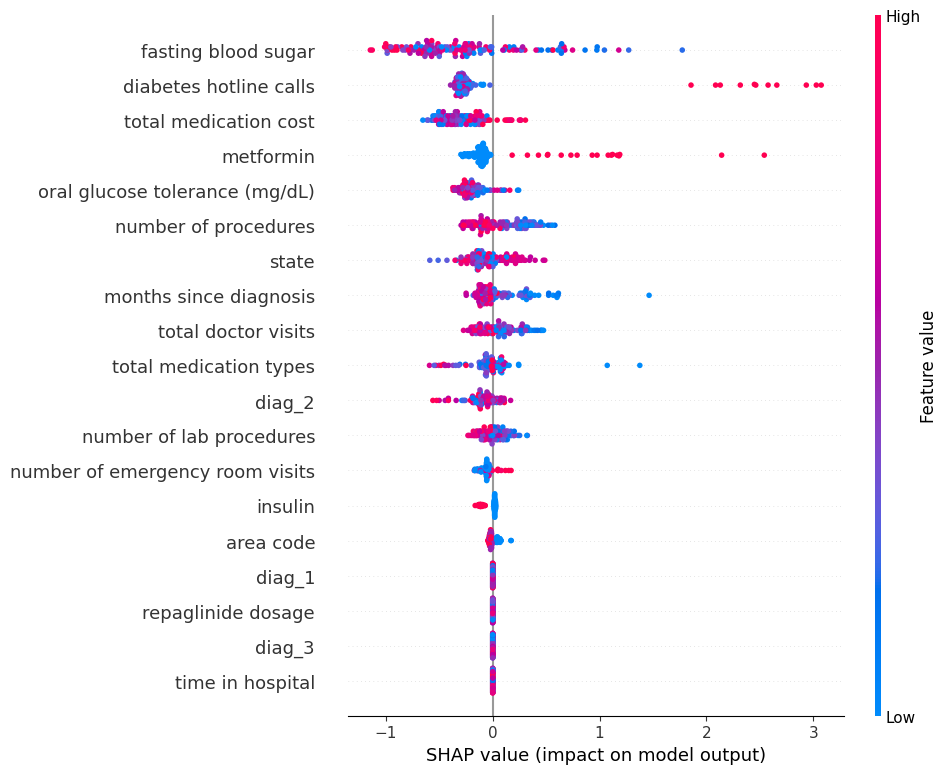

In [23]:
fig